In [11]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
import os
from skimage.feature import hog
from imutils import paths
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [26]:
images = list(paths.list_images('happy and sad'))


def gray(x):
    image = cv2.imread(x)
    grayimage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return grayimage


def imageSize(x, size):
    return cv2.resize(x, (size, size))


def feature_extract(images):
    features = []
    labels = []

    for image in images:
        x = gray(image)
        x = imageSize(x, 64)
        hogfunc = hog(x, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(
            4, 4), block_norm='L2-Hys', transform_sqrt=False)

        label = image.split(os.path.sep)[-2]
        labels.append(label)
        features.append(hogfunc)

    features = np.array(features)
    labels = np.array(labels)
    return features, labels


features, labels = feature_extract(images)

print("[INFO] The number of features ..." + str(features.shape[1]))
print("[INFO] The number of samples ..." + str(labels.shape[0]))



[INFO] The number of features ...3600
[INFO] The number of samples ...3021


In [27]:



r = random.randint(0, 90)
y = np.where(labels == "happy",-1,1)

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2,random_state=r)
print("[INFO] The number of images used in training ..." + str(X_train.shape[0]))
print("[INFO] The number of images used in testing ..." + str(X_test.shape[0]))



[INFO] The number of images used in training ...2416
[INFO] The number of images used in testing ...605


In [28]:
class SVM: 
    def __init__(self, learning_rate=0.0001, epochs=1000, lambda_paramater=0.01):
        self.weight = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.lambda_paramater = lambda_paramater
        
        
    def fit(self,X_train,y_train):
        featuers= X_train.shape[1]
        y = np.where(y_train <= 0,-1,1)
        self.weight = np.zeros(featuers)
        self.bias=0

        for epoch in range(self.epochs):
            for i, x in enumerate(X_train):
                #y* wx + b 
                classfier = y[i]*(np.dot(x , self.weight)-self.bias) >= 1
                if classfier :
                    #Hinge loss 
                    self.weight -= self.learning_rate * \
                        (2 * self.lambda_paramater * self.weight)
                else:
                    self.weight -= self.learning_rate * \
                        (2 * self.lambda_paramater * self.weight - np.dot(x, y[i]))
                    self.bias -= self.learning_rate * y[i]
                    
    def predict(self,X_test):
        return np.sign(np.dot(X_test,self.weight)-self.bias)
    

Test Result:
Accuracy Score : 76.86%
_______________________________________________
CLASSIFICATION REPORT (happy = -1 , sad = 1):
              precision    recall  f1-score   support

          -1       0.76      0.87      0.81       349
           1       0.78      0.62      0.70       256

    accuracy                           0.77       605
   macro avg       0.77      0.75      0.75       605
weighted avg       0.77      0.77      0.76       605

_______________________________________________
Confusion Matrix: 
 AxesSubplot(0.22375,0.11;0.5775x0.77)



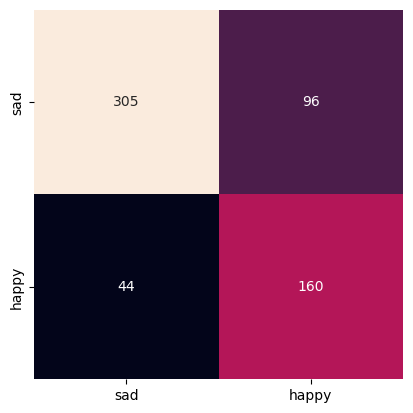

In [31]:
model = SVM()
clf = model.fit(X_train,y_train)
pred = model.predict(X_test)
classifreport = classification_report(y_test, pred)
mat = confusion_matrix(y_test, pred)
heatmap = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                      xticklabels=set(labels),
                      yticklabels=set(labels))

print("Test Result:\n================================================")
print(
    f"Accuracy Score : {accuracy_score(y_test, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT (happy = -1 , sad = 1):\n{classifreport}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {heatmap}\n")



Test Result:
Accuracy Score : 76.20%
_______________________________________________
CLASSIFICATION REPORT (happy = -1 , sad = 1):
              precision    recall  f1-score   support

          -1       0.78      0.82      0.80       349
           1       0.73      0.69      0.71       256

    accuracy                           0.76       605
   macro avg       0.76      0.75      0.75       605
weighted avg       0.76      0.76      0.76       605

_______________________________________________
Confusion Matrix: 
 AxesSubplot(0.22375,0.11;0.5775x0.77)



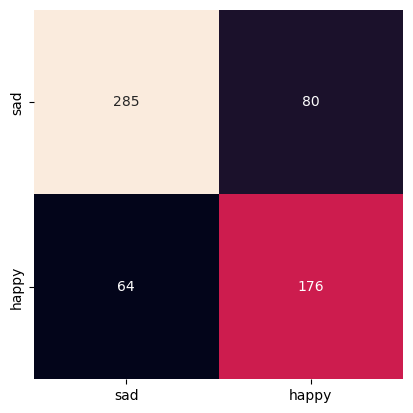

In [30]:
model = SVC(kernel="linear")
clf = model.fit(X_train, y_train)
pred = model.predict(X_test)
classifreport = classification_report(y_test, pred)
mat = confusion_matrix(y_test, pred)
heatmap = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                      xticklabels=set(labels),
                      yticklabels=set(labels))

print("Test Result:\n================================================")
print(
    f"Accuracy Score : {accuracy_score(y_test, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT (happy = -1 , sad = 1):\n{classifreport}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {heatmap}\n")
